In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import wrangle

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [ ]:
df = wrangle.get_zillow_2017()
df.columns
df.isna().sum()

In [ ]:
df = pd.read_csv('zillow_2017.csv')
df.columns
df.propertylandusetypeid.value_counts()

In [ ]:
df = wrangle.wrangle_zillow()

In [ ]:
df_cols = df.columns
df_cols = df_cols.to_list()
df_cols.remove('fips_location')
df_cols.remove('fips')
df_cols .remove('propertytypeid')

In [ ]:
df_cols

In [ ]:
for col in df_cols: 
    if df[col].dtype == 'object':
        sns.countplot(data=df, x=col, palette='magma')
        plt.xlabel('County Name')
        plt.ylabel('Count (mil)')
        plt.title(f'Propery Count by FIPS Codes')
        plt.show()
    if col in ['bedrooms', 'bathrooms', 'squarefeet', 'taxvalue', 'yearbuilt', 'taxamount']:
        sns.boxplot(data=df, x=col, palette='magma')
        plt.show()


In [ ]:
plt.figure(figsize=(50,10))
for i, col in enumerate(df_cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(df_cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

In [ ]:
df.squarefeet.min()

In [ ]:
df.propertytypeid.value_counts()

In [ ]:
df.bedrooms.value_counts()

In [ ]:
# Now to get rid of those pesky outliers

In [ ]:
df.describe().T

In [ ]:
# Lets look at the bathroom series

In [ ]:
df['bathrooms'].describe()['25%']

In [ ]:
df['bathrooms'].describe()['75%']

In [ ]:
bathrooms_iqr = df['bathrooms'].describe()['75%'] - df['bathrooms'].describe()['25%']

In [ ]:
lower_bathroom_fence = df['bathrooms'].describe()['25%'] - (1.5*bathrooms_iqr)
lower_bathroom_fence

In [ ]:
upper_bathroom_fence = df['bathrooms'].describe()['75%'] + (1.5*bathrooms_iqr)
upper_bathroom_fence

In [ ]:
df[(df.bathrooms > lower_bathroom_fence) & (df.bathrooms < upper_bathroom_fence)].bathrooms.value_counts()

In [ ]:
def remove_outliers(df, df_cols, k=1.5):
    col_qs = {}
    
    for col in df_cols:
        col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])
        # print(col_qs)
    
    for col in df_cols:    
        iqr = col_qs[col][0.75] - col_qs[col][0.25]
        lower_fence = col_qs[col][0.25] - (iqr*k)
        upper_fence = col_qs[col][0.75] + (iqr*k)
        #print(f'Lower fence of {col}: {lower_fence}')
        #print(f'Upper fence of {col}: {upper_fence}')
        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [ ]:
df.info(show_counts=True)

In [ ]:
smol_df = remove_outliers(df, df_cols)

In [ ]:
smol_df.columns

In [ ]:
df

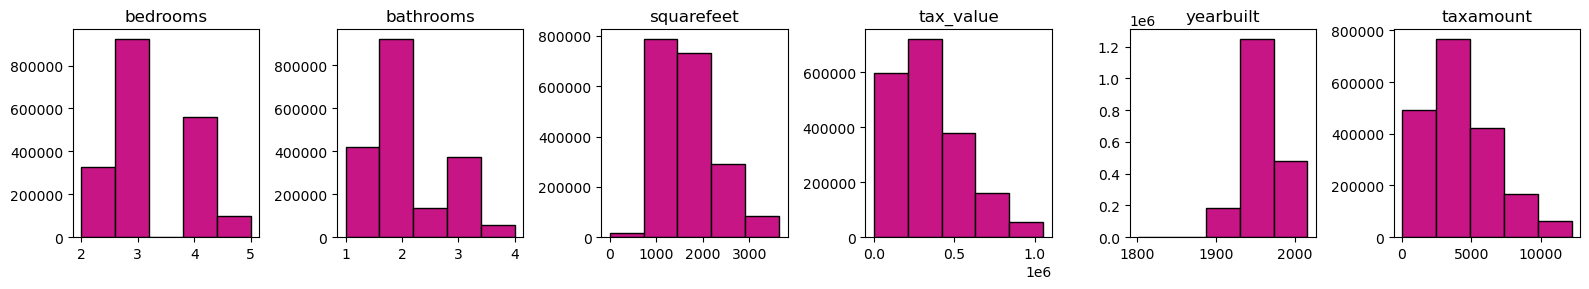

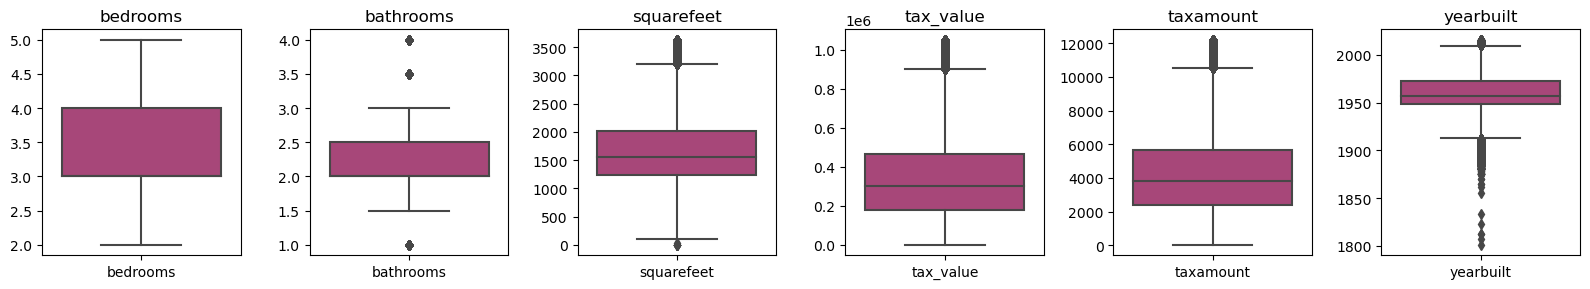

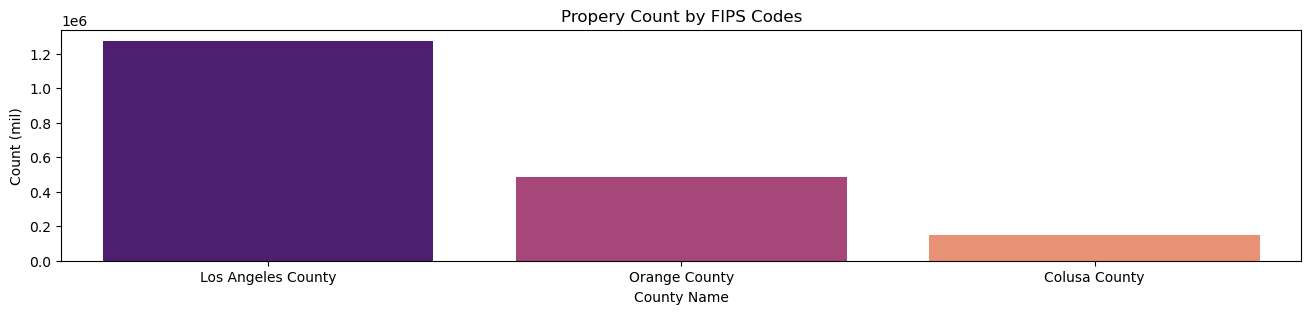

In [2]:
train, validate, test = wrangle.wrangle_zillow()

,bedrooms,bathrooms,squarefeet,tax_value,yearbuilt,taxamount,fips,propertytypeid,fips_location
1162651,3.0,2.0,1537.0,202000.0,2008.0,3410.01,6037,261,Los Angeles County
782265,3.0,3.0,1780.0,533026.0,1958.0,6415.11,6037,261,Los Angeles County
405503,4.0,2.0,1839.0,358975.0,1981.0,4575.06,6037,261,Los Angeles County
1028626,4.0,2.0,1756.0,543158.0,1950.0,6721.89,6037,261,Los Angeles County
1802146,3.0,2.0,1212.0,331065.0,1958.0,3610.64,6037,261,Los Angeles County
